In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

![](img/crispdm.png)

![](img/shiva.jpeg)

## Kaggle titanic competition

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

https://www.kaggle.com/c/titanic/overview

| Variable | Definition | Key | 
|----------|------------|-----|
|survival| Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket| Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [3]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.15.4
0.23.4
0.9.0


![text](img/data_frame.png)

Read data

In [4]:
df = pd.read_csv('titanic_train.csv', sep=',')

In [5]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Which columns do we have?

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(891, 12)

In [7]:
# number of rows, number of columns?

n_rows, n_col = df.shape
print('Rows:', n_rows, 'Cols:', n_col)

_, n_col = df.shape
print('Cols:', n_col)

n_rows, _ = df.shape
print('Rows:', n_rows)

Rows: 891 Cols: 12
Cols: 12
Rows: 891


In [8]:
# covert columns to lower case
df.columns = [c.lower() for c in df.columns]

print(df.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [9]:
df.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Data types

In [10]:
# Doesn't automatically detect factors -> string -> object
df.dtypes

passengerid      int64
survived         int64
pclass           int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

In [11]:
# Number of non-empty values
df.count()

passengerid    891
survived       891
pclass         891
name           891
sex            891
age            714
sibsp          891
parch          891
ticket         891
fare           891
cabin          204
embarked       889
dtype: int64

In [12]:
# Essentially R's summary
df.describe()

passengerid    survived      pclass         age       sibsp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            parch        fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [13]:
# get row at position 10
# iloc -> numerical index
# loc -> actual index from data (usually the same but can also be a date, string, ...)

df.iloc[10]

passengerid                                 11
survived                                     1
pclass                                       3
name           Sandstrom, Miss. Marguerite Rut
sex                                     female
age                                          4
sibsp                                        1
parch                                        1
ticket                                 PP 9549
fare                                      16.7
cabin                                       G6
embarked                                     S
Name: 10, dtype: object

In [14]:
# python slice syntax

lst = np.arange(1, 10)

print('Array:', lst)
print('Array from 2 to 5 position', lst[2:5])
print(r'Boundaries are [from; to)')

Array: [1 2 3 4 5 6 7 8 9]
Array from 2 to 5 position [3 4 5]
Boundaries are [from; to)


In [15]:
# get row at index label = 10

# dataframes: both inclusinve
# python-slice: start inclusive, end exclusive 

# note that loc includes both ends! 
# [from; to]
df.loc[10:15]

passengerid  survived  pclass                                  name  \
10           11         1       3       Sandstrom, Miss. Marguerite Rut   
11           12         1       1              Bonnell, Miss. Elizabeth   
12           13         0       3        Saundercock, Mr. William Henry   
13           14         0       3           Andersson, Mr. Anders Johan   
14           15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
15           16         1       2      Hewlett, Mrs. (Mary D Kingcome)    

       sex   age  sibsp  parch     ticket     fare cabin embarked  
10  female   4.0      1      1    PP 9549  16.7000    G6        S  
11  female  58.0      0      0     113783  26.5500  C103        S  
12    male  20.0      0      0  A/5. 2151   8.0500   NaN        S  
13    male  39.0      1      5     347082  31.2750   NaN        S  
14  female  14.0      0      0     350406   7.8542   NaN        S  
15  female  55.0      0      0     248706  16.0000   NaN        S

In [16]:
# get sex attribute of row with label 10
# columns can be indexed via numerical index and name


df.loc[10, ['sex', 'pclass']]

sex       female
pclass         3
Name: 10, dtype: object

In [17]:
cond = (
    (df['age'] < 10) & 
    (df['age'] < 10) &
    (
        (df['age'] < 10) | (df['age'] < 10)
    )
)

# Indiexing with binary array (cond)
df[cond].tail()

passengerid  survived  pclass                                     name  \
827          828         1       2                    Mallet, Master. Andre   
831          832         1       2          Richards, Master. George Sibley   
850          851         0       3  Andersson, Master. Sigvard Harald Elias   
852          853         0       3                  Boulos, Miss. Nourelain   
869          870         1       3          Johnson, Master. Harold Theodor   

        sex   age  sibsp  parch           ticket     fare cabin embarked  
827    male  1.00      0      2  S.C./PARIS 2079  37.0042   NaN        C  
831    male  0.83      1      1            29106  18.7500   NaN        S  
850    male  4.00      4      2           347082  31.2750   NaN        S  
852  female  9.00      1      1             2678  15.2458   NaN        C  
869    male  4.00      1      1           347742  11.1333   NaN        S

In [19]:
df[(df['age'] < 10) & (df['parch'] == 0)]

passengerid  survived  pclass                           name     sex  \
777          778         1       3  Emanuel, Miss. Virginia Ethel  female   

     age  sibsp  parch  ticket    fare cabin embarked  
777  5.0      0      0  364516  12.475   NaN        S

In [20]:
# Returns new vector again, doesn't mutate
df['sex'].astype('category').describe()

count      891
unique       2
top       male
freq       577
Name: sex, dtype: object

# Descriptive statistics

In [21]:
# all number series have mean, std, sum, min, max, quantile methods

print('mean age: {:.2f}; std: {:.2f}'.format(df['age'].mean(), df['age'].std()))

mean age: 29.70; std: 14.53


In [22]:
# counts unique values
df['pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: pclass, dtype: int64

In [23]:
# wrap complex multi-line expression into braces 
(
    df['pclass'].value_counts(normalize=True)
    .sort_index()
)

1    0.242424
2    0.206510
3    0.551066
Name: pclass, dtype: float64

# missing values

Missing value in python represented by `None` constant

in padnas is it represented by `np.nan` 

In [24]:
# NaN doesn't equal to NaN
age = np.nan
age == np.nan

False

In [25]:
np.isnan(age)

True

In [26]:
# check something is np.nan

df['age'].isna().head()

0    False
1    False
2    False
3    False
4    False
Name: age, dtype: bool

In [27]:
df['age'].notna().head()

0    True
1    True
2    True
3    True
4    True
Name: age, dtype: bool

In [28]:
# Can drop w.r.t to certain fows / collumns 
# Returns new dataframe, doesn't mutate
df.dropna().head()

passengerid  survived  pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 name     sex   age  sibsp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    parch    ticket     fare cabin embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
10      1   PP 9549  16.7000    G6        S  
11      0    113783  26.5500  C103        S

In [29]:
# Set missing values to median age
df.loc[df['age'].isna(), 'age'] = df['age'].median()

# alternatively using fillna method
# fillna returns new vector, doesn't mutate (again)
df['age'] = df['age'].fillna(df['age'].median())

### Aggregations

In [ ]:
# general syntax

df.groupby(['a', 'b']).agg({
    'c': {
        'first': 'sum',
        'second': 'mean'
    },
    'd': {
        'fourth': 'nunique'
    }
})

In [ ]:
# by default grouping variable becomes index

df.groupby('pclass').agg({
    'fare': 'mean'
})

In [31]:
# use reset index to leave pclass as column

df.groupby('pclass').agg({
    'fare': 'mean'
}).reset_index()

pclass       fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

In [32]:
fare_by_class = df.groupby('pclass').agg({
    'fare': 'mean'
}).reset_index()

# rename columns
fare_by_class.columns = ['pclass', 'mean_fare']

# alternatively
# fare_by_class = fare_by_class.rename(columns={'fare': 'mean_fare'})

fare_by_class.head()

pclass  mean_fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

In [ ]:
# "how" keyword controls join behaviour: inner, left, right, outer
pd.merge(left=, right=, left_on=, right_on=, how='')

# if column names for join are the same in left/right DF, we can use ON keyword
pd.merge(left=, right=, on=)

In [34]:
df_with_fares = pd.merge(df, fare_by_class, on='pclass')

df_with_fares['delta_fare'] = df_with_fares['fare'] - df_with_fares['mean_fare']
df_with_fares.head()

passengerid  survived  pclass                            name     sex  \
0            1         0       3         Braund, Mr. Owen Harris    male   
1            3         1       3          Heikkinen, Miss. Laina  female   
2            5         0       3        Allen, Mr. William Henry    male   
3            6         0       3                Moran, Mr. James    male   
4            8         0       3  Palsson, Master. Gosta Leonard    male   

    age  sibsp  parch            ticket     fare cabin embarked  mean_fare  \
0  22.0      1      0         A/5 21171   7.2500   NaN        S   13.67555   
1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   13.67555   
2  35.0      0      0            373450   8.0500   NaN        S   13.67555   
3  28.0      0      0            330877   8.4583   NaN        Q   13.67555   
4   2.0      3      1            349909  21.0750   NaN        S   13.67555   

   delta_fare  
0    -6.42555  
1    -5.75055  
2    -5.62555  
3    -5.21725  
4     7.39945

### Plotting

![text](img/anatomy.png)

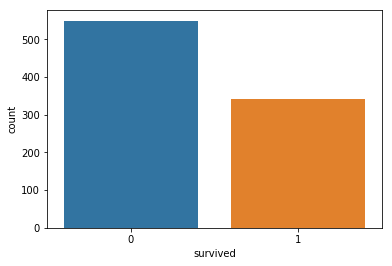

In [34]:
sns.countplot(df['survived']);

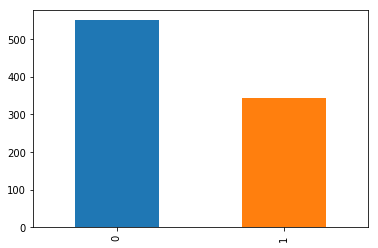

In [35]:
df['survived'].value_counts().plot.bar();

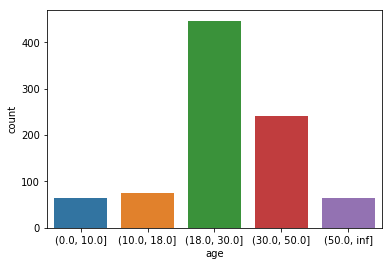

In [36]:
# split customers into user-defined age ranges
age_bins = pd.cut(df['age'], [0, 10, 18, 30, 50, np.inf])

sns.countplot(age_bins);

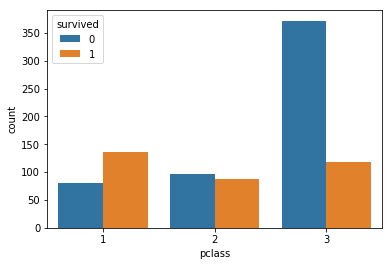

In [37]:
sns.countplot('pclass', data=df, hue='survived');

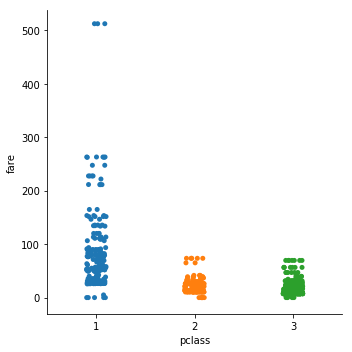

In [38]:
sns.catplot(data=df, x='pclass', y='fare');

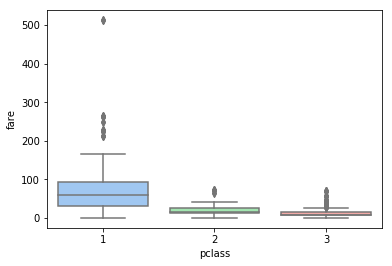

In [39]:
# use temporal style
with plt.style.context(('seaborn-pastel')):
    sns.boxplot(data=df, x='pclass', y='fare');

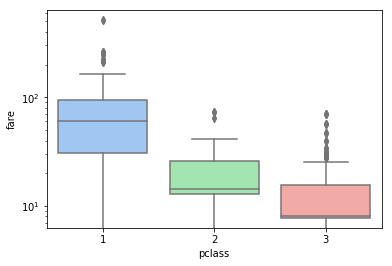

In [40]:
# use temporal style
with plt.style.context(('seaborn-pastel')):
    sns.boxplot(data=df, x='pclass', y='fare');
    plt.yscale('log')

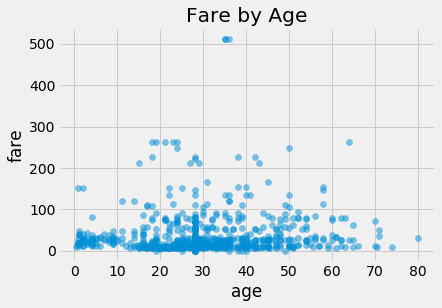

In [41]:
# use temporal style
with plt.style.context(('fivethirtyeight')):
    plt.scatter(    
        df['age'],
        df['fare'], alpha=0.5
    )

    plt.title('Fare by Age')
    plt.xlabel('age')
    plt.ylabel('fare');

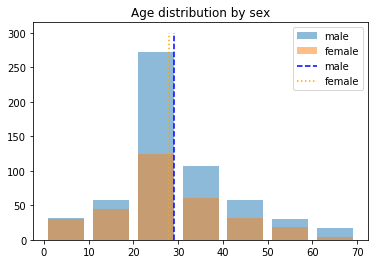

In [42]:
plt.hist(df[df['sex'] == 'male']['age'], alpha=0.5, rwidth=0.8, bins=range(0, 80, 10), label='male')
plt.hist(df[df['sex'] == 'female']['age'], alpha=0.5, rwidth=0.8, bins=range(0, 80, 10), label='female')

plt.title('Age distribution by sex')
plt.vlines(df[df['sex'] == 'male']['age'].median() + 1, 0, 300, label='male', colors='blue', linestyles='dashed')
plt.vlines(df[df['sex'] == 'female']['age'].median(), 0, 300, label='female', colors='orange', linestyles='dotted')
plt.legend();

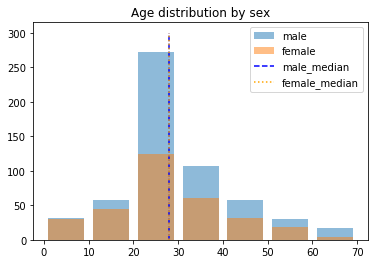

In [43]:
styles = [('male', 'blue', 'dashed'), ('female', 'orange', 'dotted')]

for sex, line_color, line_style in styles:
    sex_age_data = df[df['sex'] == sex]['age']
    plt.hist(sex_age_data, alpha=0.5, rwidth=0.8, bins=range(0, 80, 10), label=sex)
    plt.vlines(sex_age_data.median(), 0, 300, label='{}_median'.format(sex), colors=line_color, linestyles=line_style)

plt.title('Age distribution by sex')
plt.legend();

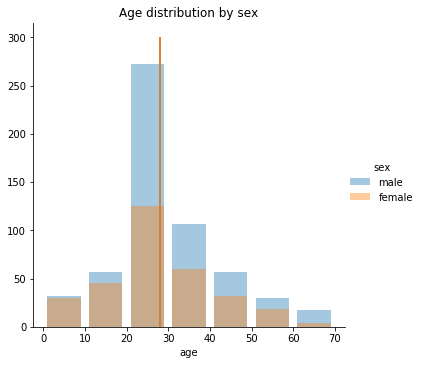

In [45]:
fce = sns.FacetGrid(data=df, hue='sex', height=5)

def plot_hline(data, color, label):
    plt.vlines(data.median(), 0, 300, label='{}_median'.format(label), colors=color)
    
fce.map(plot_hline, 'age')
fce.map(sns.distplot, 'age', kde=False, bins=range(0, 80, 10), hist_kws={'rwidth':0.8}).add_legend();

plt.title('Age distribution by sex');

In [46]:
df[['age', 'pclass']].head()

age  pclass
0  22.0       3
1  38.0       1
2  26.0       3
3  35.0       1
4  35.0       3

In [47]:
df[['age', 'pclass']].apply(lambda x: x['age'] * x['pclass'], axis=1).head()

0     66.0
1     38.0
2     78.0
3     35.0
4    105.0
dtype: float64

In [48]:
(df['age'] * df['pclass']).head()

0     66.0
1     38.0
2     78.0
3     35.0
4    105.0
dtype: float64

In [49]:
df['name'].apply(lambda x: x.split()).apply(lambda x: x[0]).head()

0       Braund,
1      Cumings,
2    Heikkinen,
3     Futrelle,
4        Allen,
Name: name, dtype: object

In [50]:
df['age'].apply(lambda x: x**2).head()

0     484.0
1    1444.0
2     676.0
3    1225.0
4    1225.0
Name: age, dtype: float64

In [51]:
pd.crosstab(df['pclass'], df['survived'], margins=True).T

pclass      1    2    3  All
survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891

In [52]:
# dataframe strings methods 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

df['name'].str.split().head()

0                         [Braund,, Mr., Owen, Harris]
1    [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                           [Heikkinen,, Miss., Laina]
3    [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                        [Allen,, Mr., William, Henry]
Name: name, dtype: object

### Task: What is the average age by pclass?

In [55]:
age_by_class = df.groupby('pclass').agg({
    'age': 'mean'
})
age_by_class

# df.groupby("pclass")[['age']].mean() -> dataframe
# df.groupby("pclass")['age'].mean() -> vector


age
pclass           
1       38.233441
2       29.877630
3       25.140620

### Task: Were there any children without parents?

In [63]:
df.columns
df[(df['age'] < 18) & df['parch'] == 1]


passengerid  survived  pclass                                    name  \
7              8         0       3          Palsson, Master. Gosta Leonard   
10            11         1       3         Sandstrom, Miss. Marguerite Rut   
16            17         0       3                    Rice, Master. Eugene   
24            25         0       3           Palsson, Miss. Torborg Danira   
50            51         0       3              Panula, Master. Juha Niilo   
86            87         0       3                  Ford, Mr. William Neal   
164          165         0       3            Panula, Master. Eino Viljami   
171          172         0       3                    Rice, Master. Arthur   
172          173         1       3            Johnson, Miss. Eleanor Ileen   
183          184         1       2               Becker, Master. Richard F   
193          194         1       2              Navratil, Master. Michel M   
205          206         0       3              Strom, Miss. Telma Matilda   
266          267         0       3               Panula, Mr. Ernesti Arvid   
278          279         0       3                      Rice, Master. Eric   
329          330         1       1            Hippach, Miss. Jean Gertrude   
340          341         1       2          Navratil, Master. Edmond Roger   
348          349         1       3  Coutts, Master. William Loch "William"   
352          353         0       3                      Elias, Mr. Tannous   
374          375         0       3              Palsson, Miss. Stina Viola   
407          408         1       2          Richards, Master. William Rowe   
446          447         1       2       Mellinger, Miss. Madeleine Violet   
448          449         1       3          Baclini, Miss. Marie Catherine   
469          470         1       3           Baclini, Miss. Helene Barbara   
479          480         1       3                Hirvonen, Miss. Hildur E   
489          490         1       3   Coutts, Master. Eden Leslie "Neville"   
530          531         1       2                Quick, Miss. Phyllis May   
532          533         0       3                    Elias, Mr. Joseph Jr   
549          550         1       2          Davies, Master. John Morgan Jr   
618          619         1       2             Becker, Miss. Marion Louise   
644          645         1       3                  Baclini, Miss. Eugenie   
686          687         0       3                Panula, Mr. Jaako Arnold   
689          690         1       1       Madill, Miss. Georgette Alexandra   
691          692         1       3                      Karun, Miss. Manca   
720          721         1       2       Harper, Miss. Annie Jessie "Nina"   
746          747         0       3             Abbott, Mr. Rossmore Edward   
750          751         1       2                       Wells, Miss. Joan   
751          752         1       3                     Moor, Master. Meier   
755          756         1       2               Hamalainen, Master. Viljo   
787          788         0       3               Rice, Master. George Hugh   
803          804         1       3         Thomas, Master. Assad Alexander   
824          825         0       3            Panula, Master. Urho Abraham   
831          832         1       2         Richards, Master. George Sibley   
852          853         0       3                 Boulos, Miss. Nourelain   
853          854         1       1               Lines, Miss. Mary Conover   
869          870         1       3         Johnson, Master. Harold Theodor   

        sex    age  sibsp  parch      ticket      fare cabin embarked  
7      male   2.00      3      1      349909   21.0750   NaN        S  
10   female   4.00      1      1     PP 9549   16.7000    G6        S  
16     male   2.00      4      1      382652   29.1250   NaN        Q  
24   female   8.00      3      1      349909   21.0750   NaN        S  
50     male   7.00      4      1     3101295   39.6875  

### Task: What is the most popular lastname? firstname?

In [66]:
# str points to the string that is in the vector
df['name'].str.split().str[0].value_counts().sort_values(ascending=False).head()

Andersson,    9
Sage,         7
Skoog,        6
Carter,       6
Johnson,      6
Name: name, dtype: int64

### Task: Create barplot for number of siblings

### Task Create histogram of ticket fares

### Task: find 25, 75, 80, 95th quantiles of age variable

In [ ]:
quantiles = df['age'].

### Task: Did mother travelling with kids alone have better chances of survival or not?

![](img/python.png)